In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

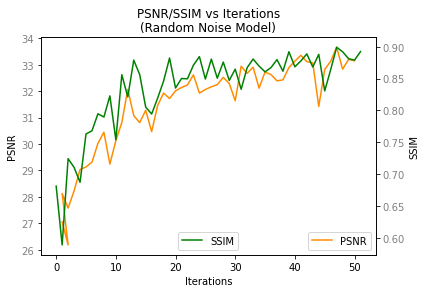

In [2]:
# Plot graphs for PSNR,SSIM and Loss

random_df = pd.read_csv("final_metrics.csv")
random_df = random_df.drop(["Unnamed: 0"],axis=1)
x = random_df["Iterations"]
y = random_df[["PSNR","SSIM","D_Loss","G_Loss"]]

fig, ax = plt.subplots()

ax.plot(x,y["PSNR"], color='darkorange', label="PSNR")
ax.tick_params(axis='y', labelcolor='gray')
ax.legend(loc="lower right")
ax2 = ax.twinx()
ax2.plot(y["SSIM"], color='green', label="SSIM")
ax2.tick_params(axis='y', labelcolor='gray')
ax2.legend(loc='lower center')
ax.set_xlabel("Iterations")
ax.set_ylabel("PSNR")
ax2.set_ylabel("SSIM")
plt.title("PSNR/SSIM vs Iterations\n(Random Noise Model)")
plt.savefig("EvalRandom.png", dpi=800)
plt.show()

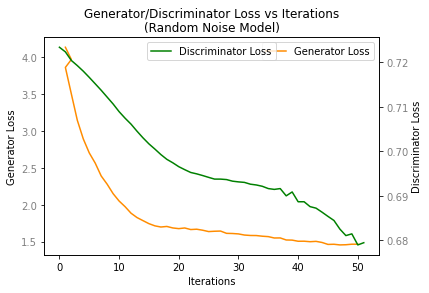

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# fig(figsize=(15,15), dpi=400)
ax.plot(x,y["G_Loss"], color='darkorange', label="Generator Loss")
ax.tick_params(axis='y', labelcolor='gray')
ax.legend(loc="upper right")
ax2 = ax.twinx()
ax2.plot(y["D_Loss"], color='green', label="Discriminator Loss")
ax2.tick_params(axis='y', labelcolor='gray')
ax2.legend(loc='upper center')
ax.set_xlabel("Iterations")
ax.set_ylabel("Generator Loss")
ax2.set_ylabel("Discriminator Loss")
plt.title("Generator/Discriminator Loss vs Iterations\n(Random Noise Model)")
plt.savefig("LossRandom.png", dpi=800)
plt.show()

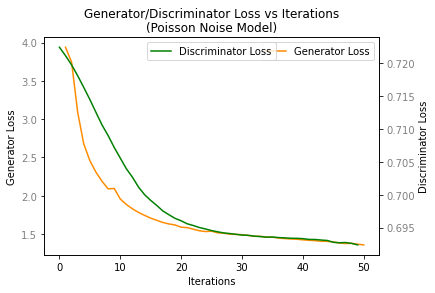

In [4]:
import matplotlib.pyplot as plt
poisson_df = pd.read_csv("poisson_final_metrics.csv")
x = poisson_df["Iterations"]
fig, ax = plt.subplots()
poisson_df = pd.read_csv("poisson_final_metrics.csv")
ax.plot(x,poisson_df["G_Loss"], color='darkorange', label="Generator Loss")
ax.tick_params(axis='y', labelcolor='gray')
ax.legend(loc="upper right")
ax2 = ax.twinx()
ax2.plot(poisson_df["D_Loss"], color='green', label="Discriminator Loss")
ax2.tick_params(axis='y', labelcolor='gray')
ax2.legend(loc='upper center')
ax.set_xlabel("Iterations")
ax.set_ylabel("Generator Loss")
ax2.set_ylabel("Discriminator Loss")
plt.title("Generator/Discriminator Loss vs Iterations\n(Poisson Noise Model)")
plt.savefig("LossPoisson.png", dpi=800)
plt.show()

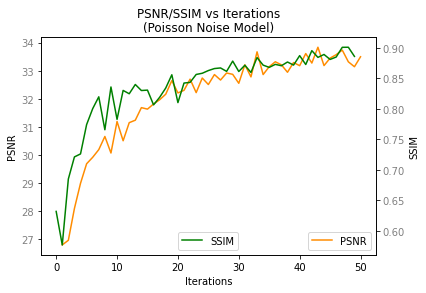

In [5]:
import matplotlib.pyplot as plt
x = poisson_df["Iterations"]
fig, ax = plt.subplots()

ax.plot(x,poisson_df["PSNR"], color='darkorange', label="PSNR")
ax.tick_params(axis='y', labelcolor='gray')
ax.legend(loc="lower right")
ax2 = ax.twinx()
ax2.plot(poisson_df["SSIM"], color='green', label="SSIM")
ax2.tick_params(axis='y', labelcolor='gray')
ax2.legend(loc='lower center')
ax.set_xlabel("Iterations")
ax.set_ylabel("PSNR")
ax2.set_ylabel("SSIM")
plt.title("PSNR/SSIM vs Iterations\n(Poisson Noise Model)")
plt.savefig("EvalPoisson.png", dpi=800)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

In [8]:
from PIL import Image
im1 = Image.open("EvalRandom.png")
im2 = Image.open("EvalPoisson.png")
im3 = Image.open("LossRandom.png")
im4 = Image.open("LossPoisson.png")
imgList = [im1, im2, im3, im4]

In [10]:
show_image_list(imgList,grid=True, num_cols=2)

AssertionError: 